# Data Analysis on Factors Influencing an Individual's Alcohol Tolerance

## Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('data_432.xlsx')

# convert multiple choice answers to categorie values
df.loc[df["smoke"] == 2, "smoke"] = 0 
df.loc[df["sex"] == 1, "sex"] = "Male"
df.loc[df["sex"] == 2, "sex"]= "Female"


df.loc[df["drinking_freq"] == 1, "drinking_freq"] = "Daily"
df.loc[df["drinking_freq"] == 2, "drinking_freq"] = "Weekly"
df.loc[df["drinking_freq"] == 3, "drinking_freq"] = "Monthly"
df.loc[df["drinking_freq"] == 4, "drinking_freq"] = "Yearly"
df.loc[df["drinking_freq"] == 5, "drinking_freq"] = "Rarely"

df.loc[df["parent_freq"] == 1, "parent_freq"] = "Very often"
df.loc[df["parent_freq"] == 2, "parent_freq"] = "Often"
df.loc[df["parent_freq"] == 3, "parent_freq"] = "Not often"
df.loc[df["parent_freq"] == 4, "parent_freq"] = "Barely"
df.loc[df["parent_freq"] == 5, "parent_freq"] = "Never"

df.loc[df["eating_2"] == 1, "eating_2"] = "Always"
df.loc[df["eating_2"] == 2, "eating_2"] = "Often"
df.loc[df["eating_2"] == 3, "eating_2"] = "Sometimes"
df.loc[df["eating_2"] == 4, "eating_2"] = "Never"

df.loc[df["stress_level"] == 1, "stress_level"] = "Very stress"
df.loc[df["stress_level"] == 2, "stress_level"] = "Stress"
df.loc[df["stress_level"] == 3, "stress_level"] = "Not too stress"
df.loc[df["stress_level"] == 4, "stress_level"] = "Never stress"

df.loc[df["liver_cond"] == 2, "liver_cond"] = 0 

df.loc[df["workout_freq"] == 1, "workout_freq"] = "Very often"
df.loc[df["workout_freq"] == 2, "workout_freq"] = "Often"
df.loc[df["workout_freq"] == 3, "workout_freq"] = "Not often"
df.loc[df["workout_freq"] == 4, "workout_freq"] = "Barely"
df.loc[df["workout_freq"] == 5, "workout_freq"] = "Never"

df = df.dropna()
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 431
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   423 non-null    int64  
 1   age                  423 non-null    float64
 2   sex                  423 non-null    object 
 3   weight               423 non-null    float64
 4   hight                423 non-null    int64  
 5   smoke                423 non-null    int64  
 6   drinking_freq        423 non-null    object 
 7   month_drinking_freq  423 non-null    float64
 8   drinking_legth       423 non-null    int64  
 9   parent_freq          423 non-null    object 
 10  eating_2             423 non-null    object 
 11  stress_level         423 non-null    object 
 12  sleep_length         423 non-null    int64  
 13  liver_cond           423 non-null    int64  
 14  tolerance            423 non-null    int64  
 15  workout_freq         423 non-null    obj

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq
0,1,23.0,Male,107.0,192,1,Weekly,4.0,3,Very often,Often,Never stress,7,0,12,Often
1,2,22.0,Female,49.0,160,1,Weekly,5.0,2,Very often,Always,Not too stress,7,0,3,Not often
2,3,23.0,Male,56.0,175,1,Weekly,8.0,3,Not often,Always,Not too stress,8,0,8,Barely
3,4,21.0,Female,53.0,170,0,Weekly,4.0,2,Barely,Often,Not too stress,8,0,2,Barely
4,5,53.0,Female,57.0,162,0,Monthly,1.0,2,Not often,Never,Stress,6,0,50,Not often
5,6,21.0,Female,50.0,166,0,Weekly,8.0,3,Barely,Often,Not too stress,8,0,20,Barely
6,7,23.0,Male,80.0,180,1,Daily,28.0,3,Very often,Always,Very stress,6,1,20,Often
7,8,23.0,Male,105.0,180,1,Weekly,4.0,4,Often,Often,Never stress,10,0,35,Often
8,9,23.0,Male,80.0,173,1,Monthly,2.0,3,Very often,Always,Never stress,5,0,100,Very often
9,10,22.0,Female,48.5,161,0,Monthly,2.0,1,Barely,Often,Stress,8,0,5,Not often


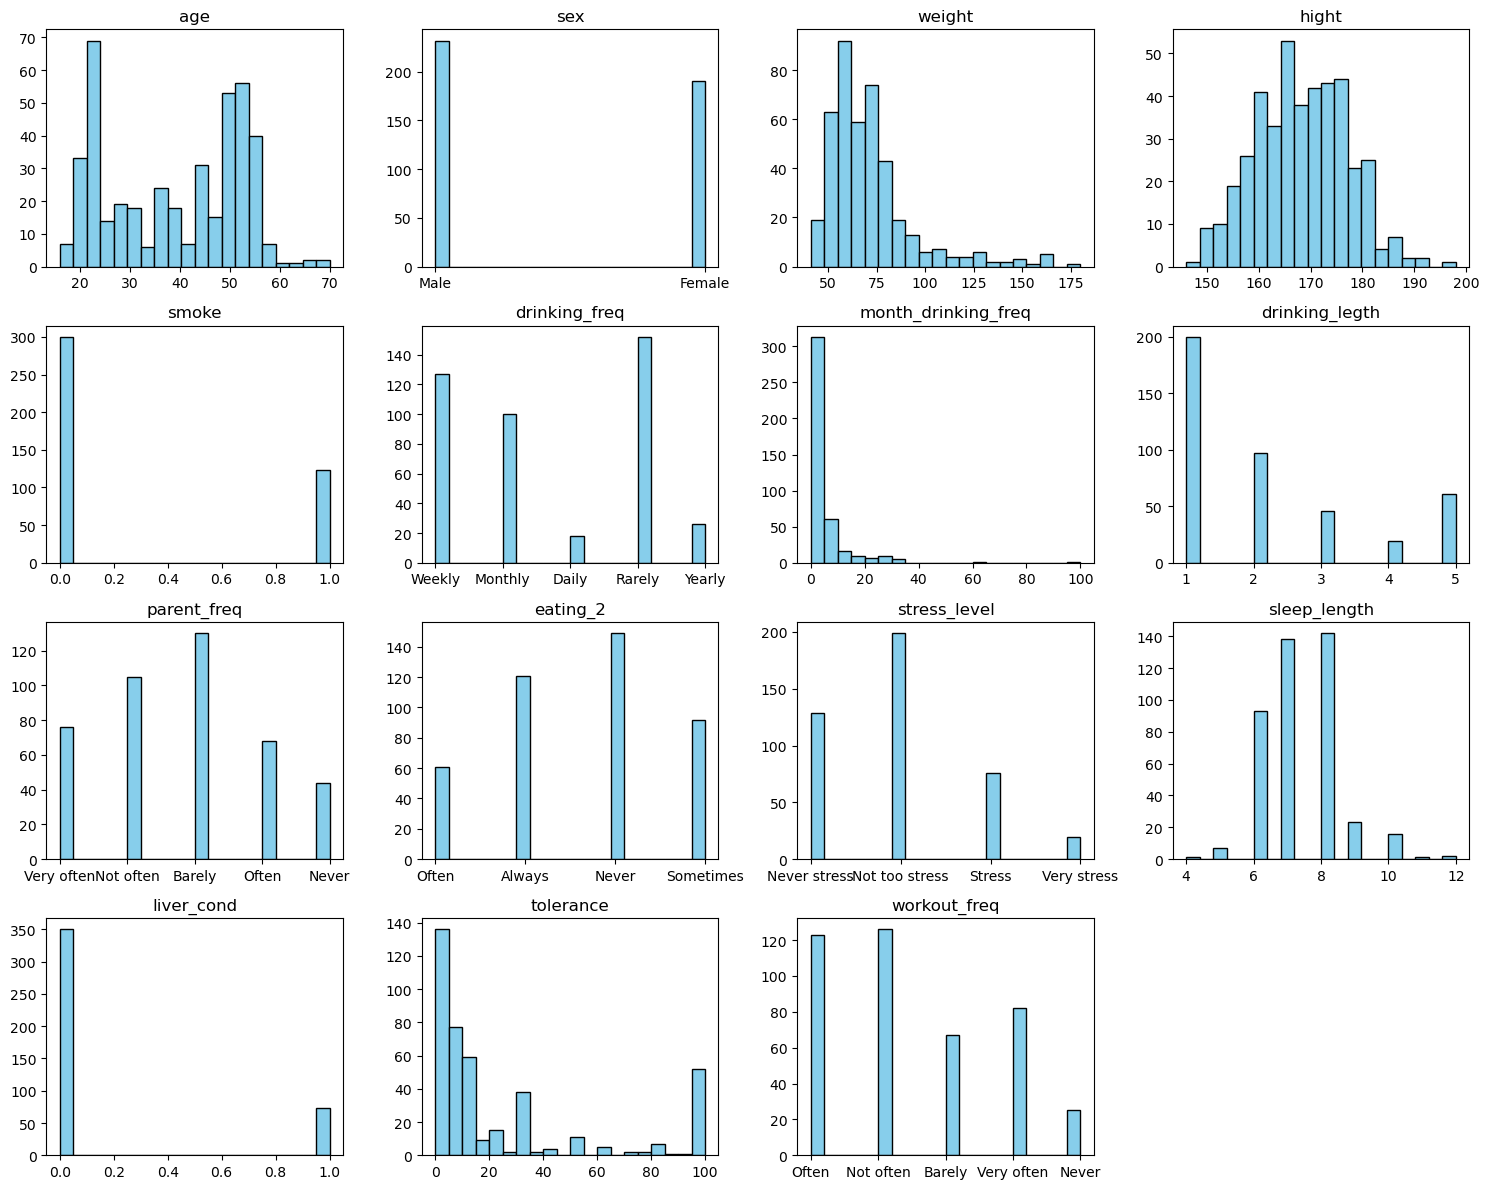

In [2]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(4, 4, i)
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)

plt.tight_layout()
plt.show()

(array([213.,  68.,  17.,  40.,   4.,  11.,   5.,   4.,   8.,  53.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

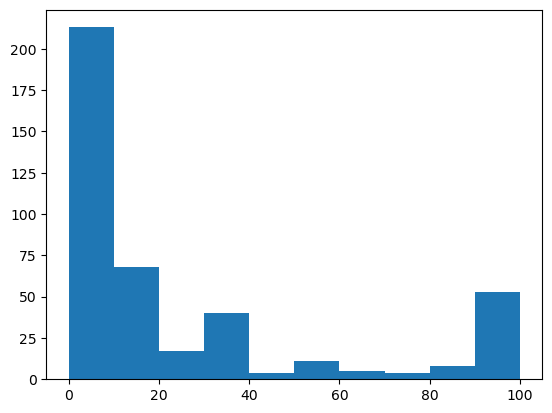

In [3]:
plt.hist(df['tolerance'])

In [4]:
df['tol_cat'] = df['tolerance'].apply(lambda x : "poor" if x < 2 else ("average" if x < 6 else ("ok" if x < 10 else ("good" if x < 15 else ('excellent' if x < 20 else "outstanding")))))

In [5]:
df.head()

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq,tol_cat
0,1,23.0,Male,107.0,192,1,Weekly,4.0,3,Very often,Often,Never stress,7,0,12,Often,good
1,2,22.0,Female,49.0,160,1,Weekly,5.0,2,Very often,Always,Not too stress,7,0,3,Not often,average
2,3,23.0,Male,56.0,175,1,Weekly,8.0,3,Not often,Always,Not too stress,8,0,8,Barely,ok
3,4,21.0,Female,53.0,170,0,Weekly,4.0,2,Barely,Often,Not too stress,8,0,2,Barely,average
4,5,53.0,Female,57.0,162,0,Monthly,1.0,2,Not often,Never,Stress,6,0,50,Not often,outstanding


In [6]:
df = df[df['tolerance'] <= 40]

## Split Traning Set and Testing Set

In [7]:
df_enc = pd.get_dummies(df, columns = ['sex', 'drinking_freq', 'parent_freq', 'eating_2',
                                      'workout_freq'])

In [8]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_enc, test_size=0.3, random_state=88)

y_train = df_train['tol_cat']
X_train = df_train.drop(['tol_cat', 'tolerance', 'id', 'stress_level'], axis=1)
y_test = df_test['tol_cat']
X_test = df_test.drop(['tol_cat', 'tolerance', 'id', 'stress_level'], axis=1)

X_train.shape, X_test.shape

((239, 29), (103, 29))

In [9]:
y_test.value_counts()

average        39
good           21
poor           17
outstanding    14
ok              9
excellent       3
Name: tol_cat, dtype: int64

In [10]:
39/103

0.3786407766990291

## Multiclass Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [12]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix : \n", cm)
print(f"Accuracy: {accuracy}")

Confusion Matrix : 
 [[30  0  4  1  3  1]
 [ 2  0  0  1  0  0]
 [11  1  3  2  2  2]
 [ 6  0  1  2  0  0]
 [ 6  2  2  0  3  1]
 [ 8  0  1  1  4  3]]
Accuracy: 0.39805825242718446


## CART Model

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),# the choice of alpha, ranging from 0 to 0.2
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}

            
dtc = DecisionTreeClassifier()

cv = KFold(n_splits=5,random_state=1,shuffle=True) 

dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=cv, verbose=1) 

dtc_cv_acc.fit(X_train, y_train)

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='accuracy', verbose=1)

In [14]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.017
Grid best score (accuracy):  0.39725177304964543


Node count = 5


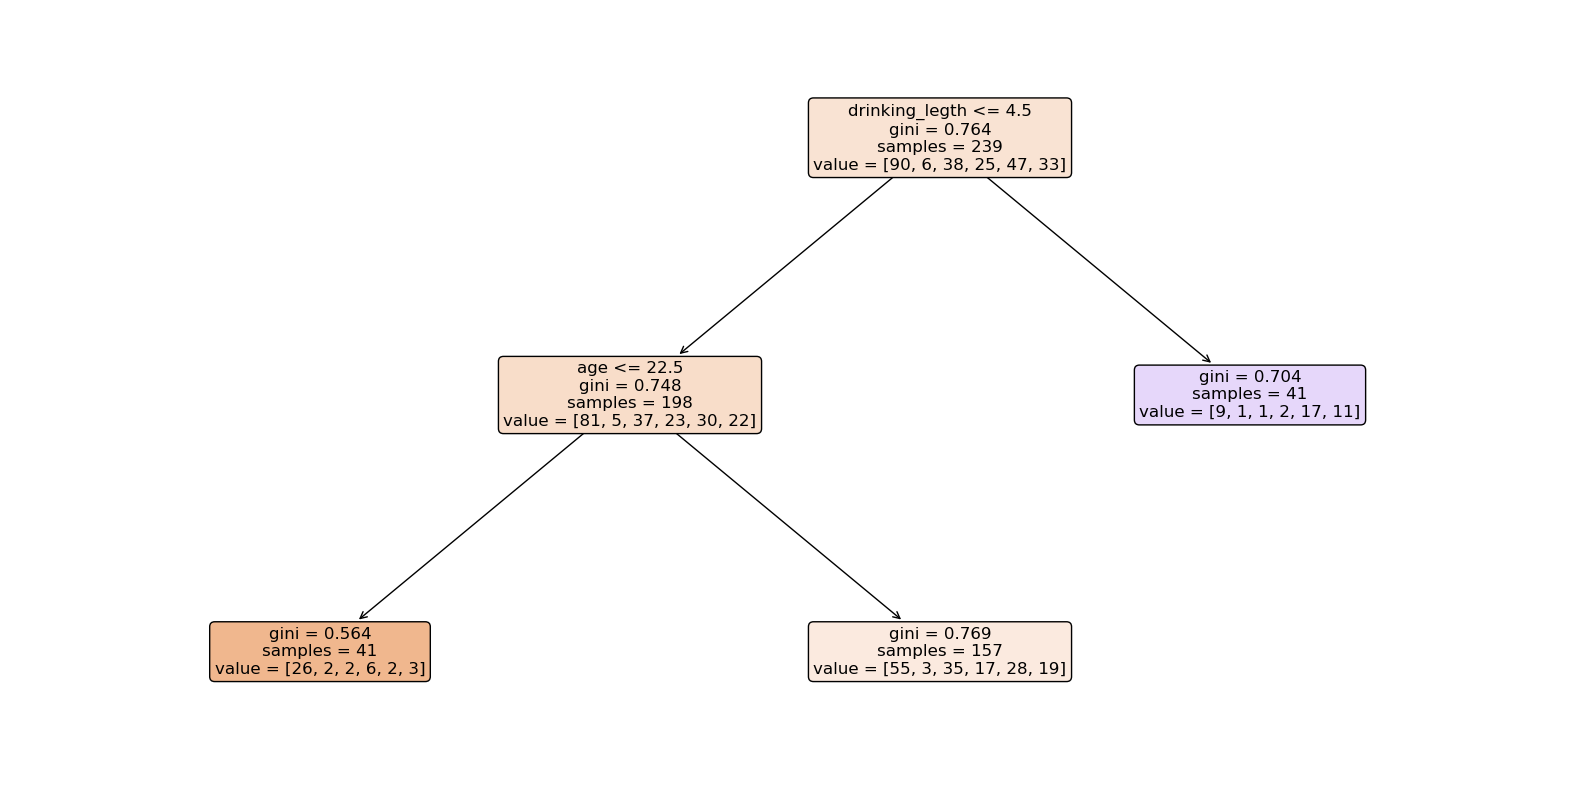

In [15]:
print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=X_train.columns, 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

In [16]:
y_pred = dtc_cv_acc.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix : \n", cm)
print(f"Accuracy: {accuracy}")

Confusion Matrix : 
 [[38  0  0  0  1  0]
 [ 3  0  0  0  0  0]
 [21  0  0  0  0  0]
 [ 9  0  0  0  0  0]
 [ 8  0  0  0  6  0]
 [13  0  0  0  4  0]]
Accuracy: 0.42718446601941745


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

grid_values = {'max_features': np.linspace(1,16,16, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 


rf = RandomForestClassifier() 

# use 5-fold cross validation 
cv = KFold(n_splits=5, random_state=333, shuffle=True) 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='accuracy', cv=cv,verbose=2)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=2, min_samples_leaf=5, n_e

GridSearchCV(cv=KFold(n_splits=5, random_state=333, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='accuracy', verbose=2)

In [18]:
max_features = rf_cv.cv_results_['param_max_features'].data
acc = rf_cv.cv_results_['mean_test_score']

print('Grid best parameter max_features (max. accuracy): ', rf_cv.best_params_['max_features'])
print('Grid best score (accuracy): ', rf_cv.best_score_)

Grid best parameter max_features (max. accuracy):  14
Grid best score (accuracy):  0.45230496453900704


In [19]:
y_pred = rf_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix : \n", cm)
print(f"Accuracy: {accuracy}")

Confusion Matrix : 
 [[32  0  3  0  2  2]
 [ 3  0  0  0  0  0]
 [15  0  4  0  2  0]
 [ 6  0  2  1  0  0]
 [ 3  0  4  0  6  1]
 [11  0  0  0  3  3]]
Accuracy: 0.44660194174757284
